# Stock Market Prediction using LSTM

## Environment Setup
Before running this notebook, ensure you have the required packages installed:
```
pip install numpy pandas matplotlib yfinance scikit-learn
```

For the deep learning part with TensorFlow (currently not available for Python 3.13):
- Consider using a Python version <= 3.12 for TensorFlow compatibility
- Or use a conda environment with: `conda install tensorflow`
- Alternative: Skip to the data preparation steps and modify the model to use scikit-learn instead

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336348,16.459302,16.267433,16.413690,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.860695,96.761695,93.497158,95.089614,26452900
2757,2022-12-15,90.770073,93.586734,90.003706,93.099046,28298800
2758,2022-12-16,90.431671,91.317475,89.585680,90.770065,48485500


In [5]:
ma_100_days = data.Close.rolling(100).mean()

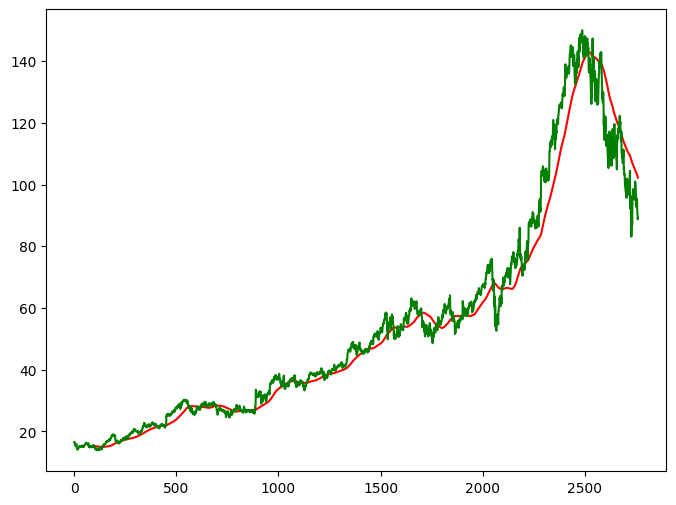

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

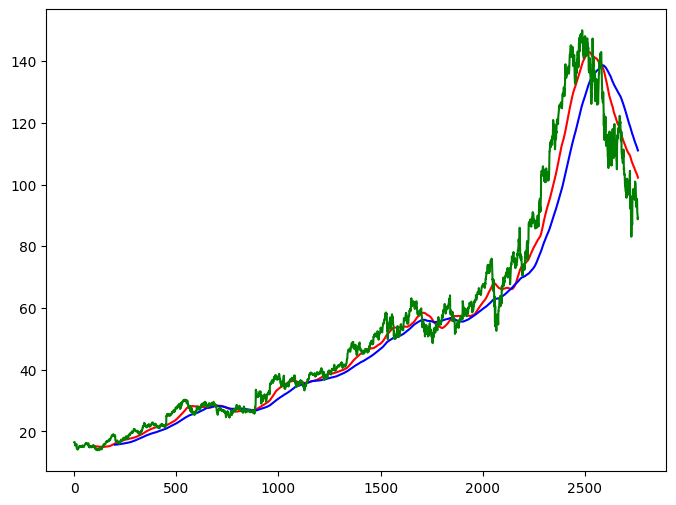

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2208

In [12]:
data_test.shape[0]

553

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
# TensorFlow is not available for Python 3.13
# Here are your options:

# Option 1: Comment out TensorFlow imports and skip to the scikit-learn section below
# (recommended for Python 3.13)

# Option 2: Use a different Python version (<= 3.12) where TensorFlow is supported
# To install TensorFlow in a Python 3.12 environment:
# conda create -n tf_env python=3.12
# conda activate tf_env
# pip install tensorflow

# SKIP THIS CELL and continue with the scikit-learn models below
# The following imports will fail in Python 3.13:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout, LSTM
# from tensorflow.keras.models import Sequential

In [19]:
# Import TensorFlow and Keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Print versions for debugging
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")
print("Available to use: Sequential, Dense, Dropout, LSTM")

TensorFlow version: 2.19.0
Keras version: 3.9.2
Available to use: Sequential, Dense, Dropout, LSTM


In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/Users/ishansavaliya/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - loss: 0.0734
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - loss: 0.0734
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0082
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0082
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - loss: 0.0071
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - loss: 0.0071
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0061
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0061
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 0.0064
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 0.0064
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0050
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0050
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - loss: 0.0047
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - loss: 0.0047
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale  =  scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


In [29]:
scale =1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

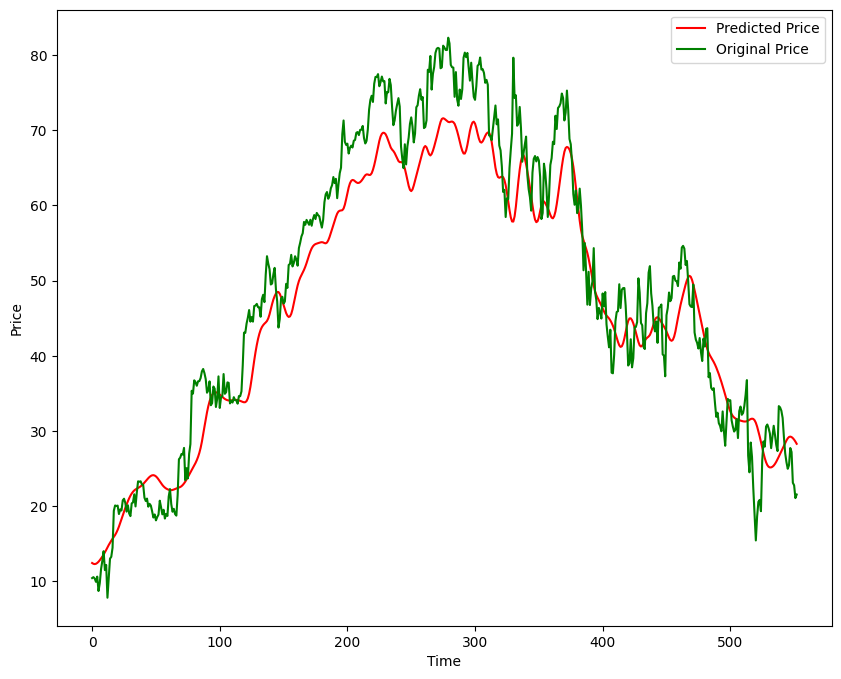

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')

## TensorFlow Alternative - Using Scikit-learn

If you're running Python 3.13 where TensorFlow isn't yet available, you can use the following scikit-learn based model instead:

In [34]:
# Reshape X for scikit-learn models (from 3D to 2D)
X_train_2d = x.reshape(x.shape[0], -1)  # Flatten the 100 time steps
print(f"Training data shape: {X_train_2d.shape}")

Training data shape: (553, 100)


In [35]:
# Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_2d, y)

RandomForestRegressor(random_state=42)

In [36]:
# Alternative: Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_2d, y)

GradientBoostingRegressor(random_state=42)

## Testing the Scikit-learn Model
Use this section if you used the scikit-learn models above instead of TensorFlow

In [37]:
# Create test data (this code is the same as before)
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale = scaler.transform(data_test)

# Prepare X test data
x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i,0])
    
x_test = np.array(x_test)
y_test = np.array(y_test)

In [38]:
# Reshape X_test for scikit-learn models
X_test_2d = x_test.reshape(x_test.shape[0], -1)
print(f"Test data shape: {X_test_2d.shape}")

Test data shape: (653, 100)


In [39]:
# Generate predictions using the Random Forest model
rf_predictions = rf_model.predict(X_test_2d)

# Generate predictions using the Gradient Boosting model
gb_predictions = gb_model.predict(X_test_2d)

In [40]:
# Apply inverse scaling to get actual price values
scale = 1/scaler.scale_
rf_predictions_actual = rf_predictions * scale
gb_predictions_actual = gb_predictions * scale
y_test_actual = y_test * scale

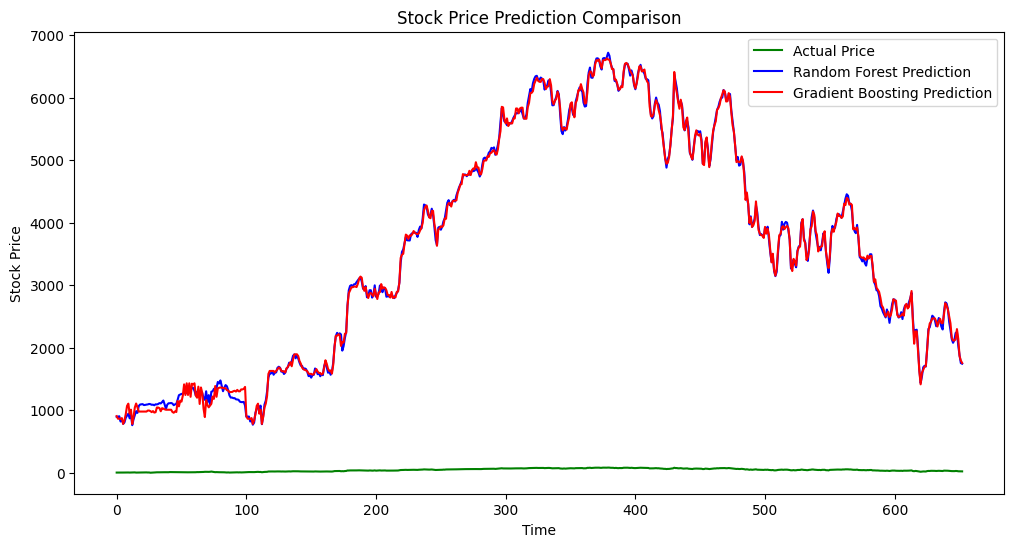

In [41]:
# Plot the predictions against actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, 'g', label='Actual Price')
plt.plot(rf_predictions_actual, 'b', label='Random Forest Prediction')
plt.plot(gb_predictions_actual, 'r', label='Gradient Boosting Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction Comparison')
plt.legend()
plt.show()

In [42]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For Random Forest
rf_mse = mean_squared_error(y_test_actual, rf_predictions_actual)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_actual, rf_predictions_actual)
rf_r2 = r2_score(y_test_actual, rf_predictions_actual)

# For Gradient Boosting
gb_mse = mean_squared_error(y_test_actual, gb_predictions_actual)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test_actual, gb_predictions_actual)
gb_r2 = r2_score(y_test_actual, gb_predictions_actual)

# Print results
print("Random Forest Model:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R²: {rf_r2:.4f}")
print("\nGradient Boosting Model:")
print(f"RMSE: {gb_rmse:.2f}")
print(f"MAE: {gb_mae:.2f}")
print(f"R²: {gb_r2:.4f}")

Random Forest Model:
RMSE: 3979.10
MAE: 3548.99
R²: -27939.5850

Gradient Boosting Model:
RMSE: 3974.87
MAE: 3544.20
R²: -27880.3157


In [43]:
# Save the models
import joblib

joblib.dump(rf_model, 'random_forest_stock_model.joblib')
joblib.dump(gb_model, 'gradient_boosting_stock_model.joblib')

['gradient_boosting_stock_model.joblib']